# Regresión: Regresión Lineal Simple


## References 

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). 
An introduction to statistical learning (Vol. 112). New York: springer.
* Data sets: http://www-bcf.usc.edu/~gareth/ISL/data.html
* SCIKIT-LEARN library example http://scikit-learn.org
* References Jupyter notebooks:
    - R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016)
    http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html
    - General Assembly's Data Science course in Washington, DC
    https://github.com/justmarkham/DAT4
    - An Introduction to Statistical Learning (James, Witten, Hastie, Tibshirani, 2013) adapted to Python code
    https://github.com/JWarmenhoven/ISLR-python


## Python Libraries

In [1]:
import numpy as np 
import pandas as pd 


# Plots:
import matplotlib.pyplot as plt 
import matplotlib.pylab as pylab
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns 
%matplotlib inline
plt.style.use(['seaborn-white'])   
params = {'legend.fontsize': 'xx-large',
              'figure.figsize': (15, 5),
              'axes.labelsize': 'xx-large',
              'axes.titlesize':'xx-large',
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large'}    
pylab.rcParams.update(params)  #fix the parameters for the plots

pd.set_option('display.notebook_repr_html', False)


from sklearn.preprocessing import scale  
import sklearn.linear_model as skl_lm 
from sklearn import neighbors 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error


import statsmodels.api as sm
import statsmodels.formula.api as smf


from patsy import dmatrix 


np.random.seed(0)

## Data set: Advertising

Advertising data set: 
sales of a product in relation with spending money on advertising TV, newspaper, radio in 200 different markets. 
- Response: Sales; thousands of units
- Predictors: TV, radio, newspaper; thousands of dollars

In [2]:
advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
advertising.describe()

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [3]:
advertising.head(3) #show 3 first rows

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3

## Coefficient estimates from data: least squares fitting

Predict sales (response variable) by considering as predictor variable the TV advertisiment budget. The linear model will be: 

$$
sales \sim \beta_0 +\beta_1 TV
$$

We want to use our training data (predictor advertising.TV and response advertising.sales) to calculate the estimates for both regression parameters. 

Minimize the RSS (residual sum of squares): 

$$
\min_{\beta_0,\beta_1} \sum_{i=1}^n (y_i - \hat{y}_i )^2 
$$

where

$$
y_i - \hat{y}_i  = y_i - (\beta_0 +\beta_1 TV)
$$

Using the sns.regplot function we can plot directly the linear fitting that we are looking for. We want to find the two coefficients such that the resulting line is as close as possible to the 200 data points. 

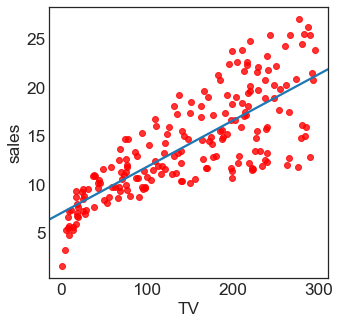

In [4]:
plt.figure(figsize=(5, 5))
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r'})

In the previous plot the distances between the red points and the line are the errors made by the linear model. As the TV increase the line is less accurate. 

In order to calculate the model parameters (estimates of the coefficients) using least squares fitting we can do the following:

In [5]:
# Regression coefficients 

#Data: Predictor and Response
#x_TV = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)#one column unknown nb of rows
x_TV = advertising.TV.values.reshape(-1, 1)#one column unknown nb of rows
y_sales = advertising.sales

#Load the model (Ordinary Least Squares)
regr_model = skl_lm.LinearRegression() 

#Fit the model with data
regr_model.fit(x_TV,y_sales) 

# Coefficients estimates
beta_0 = regr_model.intercept_
beta_1 = regr_model.coef_[0]

print('beta_0', beta_0)
print('beta_1', beta_1)

#Predict "new" values with the model
x_TV_pred = np.asarray([50, 100, 200]).reshape(-1, 1)
y_sales_pred = regr_model.predict(x_TV_pred)

print('y_sales_pred', y_sales_pred)


beta_0 7.032593549127693
beta_1 0.047536640433019764
y_sales_pred [ 9.40942557 11.78625759 16.53992164]


# K-Nearest Neighbors

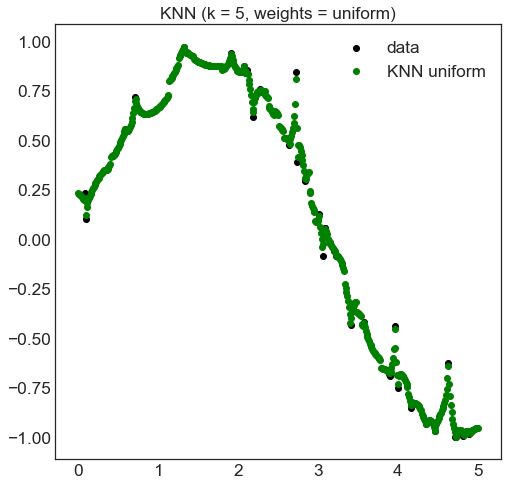

In [6]:
# Generate sample data non linear 
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() #Return a contiguous flattened array.
# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# Fit regression model
# select parameter K
n_neighbors = 5

# New samples to predict
test = np.linspace(0, 5, 500)[:, np.newaxis]

# Model
knn_model = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
test_knn_uniform = knn_model.fit(X, y).predict(test)

# Plots
plt.figure(figsize=(8,8))
#
plt.scatter(X, y, c='k', label='data')
#
plt.scatter(test, test_knn_uniform, c='g', label='KNN uniform')
#plt.plot(T, y_knn_uniform, c='g', linewidth=1)
#
plt.axis('tight')
plt.legend()
plt.title("KNN (k = " +str(n_neighbors)+ ", weights = uniform)");

## KNN distance weights

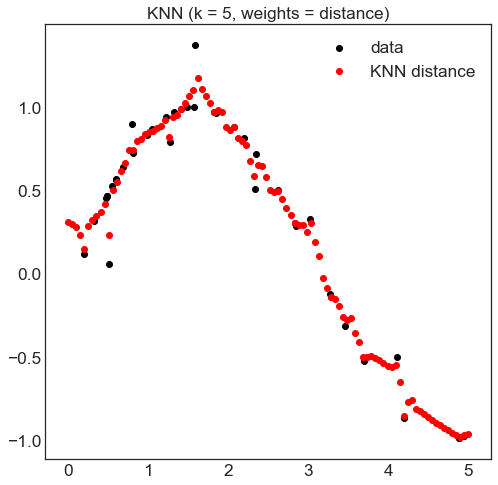

In [7]:
# Generate sample data non linear 
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# Fit regression model
# select parameter K
n_neighbors = 5

# New samples to predict
test = np.linspace(0, 5, 100)[:, np.newaxis]

# Model
knn_model_d = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
test_knn_distance = knn_model_d.fit(X, y).predict(test)

# Plots
plt.figure(figsize=(8,8))
#
plt.scatter(X, y, c='k', label='data')
#
plt.scatter(test, test_knn_distance, c='r', label='KNN distance')
#plt.plot(T, y_knn_distance, c='r')
#
plt.axis('tight')
plt.legend()
plt.title("KNN (k = " +str(n_neighbors)+ ", weights = distance)");

## Linear regression and KNN 

Under which circunstances a parametric method, such as linear regression, would be better than a non-parametric, such as K-NN? 

Answer: The parametric one will be better if the chosen shape for the parametrization (quadratic, cubic, linear, logarithmic, etc) is close to the real fucntion $f$ that defines the real model (unknown).  

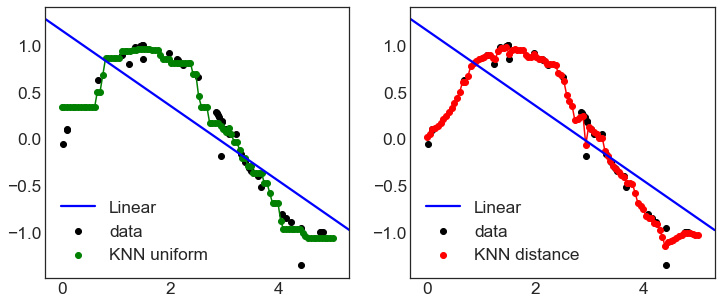

In [8]:
# Sinusoidal shape

# Generate sample data non linear 
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# New samples to predict
test = np.linspace(0, 5, 100)[:, np.newaxis]
# KNN
knn_model = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
test_knn_uniform = knn_model.fit(X, y).predict(test)
# KNN distance
knn_model_d = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
test_knn_distance = knn_model_d.fit(X, y).predict(test)

# Plots
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot (KNN uniform)
#
ax1.scatter(X, y, c='k', label='data')
#
ax1.scatter(test, test_knn_uniform, c='g', label='KNN uniform')
ax1.plot(test, test_knn_uniform, c='g')
#
sns.regplot(X, y, order=1, ci=None, scatter=False, label='Linear', ax=ax1, color='b')
ax1.legend()
# Right plot (KNN distance)
#
ax2.scatter(X, y, c='k', label='data')
ax2.scatter(test, test_knn_distance, c='r', label='KNN distance')
ax2.plot(test, test_knn_distance, c='r')
#
sns.regplot(X, y, order=1, ci=None, scatter=False, label='Linear', ax=ax2, color='b')
ax2.legend();

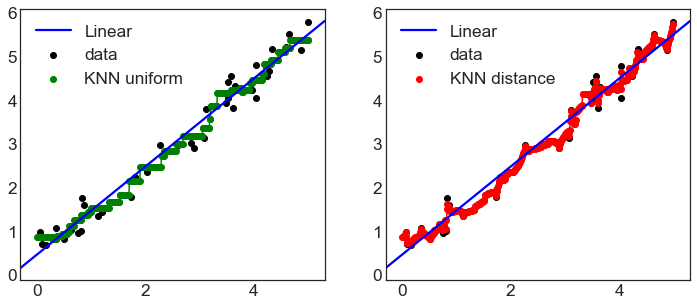

In [9]:
# Linear shape
# Generate sample data linear 
X = np.sort(5 * np.random.rand(40, 1), axis=0)
# Add noise to targets
y = X + np.random.rand(40,1)

# Fit regression model
n_neighbors = 5

# To predict
test = np.linspace(0, 5, 500)[:, np.newaxis]

# Model
knn_model_uniform = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
knn_model_distance = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
test_knn_model_uniform = knn_model_uniform.fit(X, y).predict(test)
test_knn_model_distance = knn_model_distance.fit(X, y).predict(test)

# Plots
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot (KNN uniform)
#
ax1.scatter(X, y, c='k', label='data')
#
ax1.scatter(test, test_knn_model_uniform, c='g', label='KNN uniform')
ax1.plot(test, test_knn_model_uniform, c='g')
#
sns.regplot(X, y, order=1, ci=None, scatter=False, label='Linear', ax=ax1, color='b')
ax1.legend()
# Right plot (KNN distance)
#
ax2.scatter(X, y, c='k', label='data')
ax2.scatter(test, test_knn_model_distance, c='r', label='KNN distance')
ax2.plot(test, test_knn_model_distance, c='r')
#
sns.regplot(X, y, order=1, ci=None, scatter=False, label='Linear', ax=ax2, color='b')
ax2.legend();

Achtung!!! Overfitting risk!!!

## Coefficient estimates from data: least squares fitting

Predict sales by considering as predictor variable the TV and radio advertisiment budget. The linear model will be: 

$$
sales \sim \beta_0 +\beta_1 radio +\beta_2 TV
$$

We are going to calculate the estimates coefficients as before and to plot the resulting plane considering the two predictor variables.

In [10]:
# Predictor and response data
x_predictors = advertising[['radio', 'TV']].values
y_sales = advertising.sales

# Load the model
regr_model = skl_lm.LinearRegression()
regr_model.fit(x_predictors,y_sales)


beta_0 = regr_model.intercept_
beta_1 = regr_model.coef_[0]
beta_2 = regr_model.coef_[1]

print('beta_0', beta_0)
print('beta_1', beta_1)
print('beta_2', beta_2)

beta_0 2.9210999124051398
beta_1 0.18799422662030915
beta_2 0.045754815101076145


In [11]:
# Prepare the values to be predicted with the model. 
# What are the min/max values of Radio & TV?
# Use these values to set up the grid for plotting.
advertising[['radio', 'TV']].describe()

            radio          TV
count  200.000000  200.000000
mean    23.264000  147.042500
std     14.846809   85.854236
min      0.000000    0.700000
25%      9.975000   74.375000
50%     22.900000  149.750000
75%     36.525000  218.825000
max     49.600000  296.400000

In [12]:
# Create a coordinate grid
Radio = np.arange(0,50) #Return evenly spaced values within a given interval.
TV = np.arange(0,300)

X1_Radio, X2_TV = np.meshgrid(Radio, TV, indexing='xy')
Z_model = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z_model):
        Z_model[i,j] =(beta_0 + X1_Radio[i,j]*beta_1 + X2_TV[i,j]*beta_2)

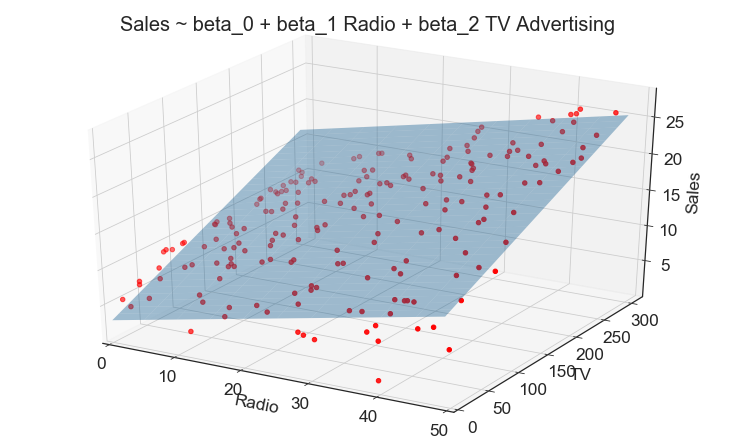

In [13]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Sales ~ beta_0 + beta_1 Radio + beta_2 TV Advertising', fontsize=20)
ax = axes3d.Axes3D(fig)
# Model
ax.plot_surface(X1_Radio, X2_TV, Z_model, rstride=10, cstride=5, alpha=0.4)
# Data 
ax.scatter3D(advertising.radio, advertising.TV, advertising.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(bottom=0)
ax.set_zlabel('Sales');

## Multiple Regression: linear without additive assumptions

Predict sales by considering as predictor variable the TV and radio advertisiment budget, but including also a relation between both quantities. 

The linear model will be: 

$$
sales \sim \beta_0 +\beta_1 radio +\beta_2 TV + \beta_3 radio * TV
$$

We are going to calculate the estimates coefficients as before and to plot the resulting linear plane considering the two predictor variables Radio and TV.

In [14]:
# Predictor and response data. 

# 3 predictors
x_radio = advertising[['radio']].values.reshape(-1, 1)
x_TV = advertising[['TV']].values.reshape(-1, 1)
x_RadxTV = np.multiply(x_radio, x_TV)

# Include all in one matrix with 3 columns
x_1 = np.concatenate((x_radio, x_TV), axis=1)
x_predictors = np.concatenate((x_1, x_RadxTV), axis=1)

# Response
y_sales = advertising.sales

# Load the model
regr_model = skl_lm.LinearRegression()
regr_model.fit(x_predictors,y_sales)

# Coefficient estimates
beta_0 = regr_model.intercept_
print('beta_0', beta_0)

#Vector with 3 coefficients
beta_1 = regr_model.coef_[0]
beta_2 = regr_model.coef_[1]
beta_3 = regr_model.coef_[2]

print('beta_1', beta_1)
print('beta_2', beta_2)
print('beta_3', beta_3)

beta_0 6.750220203075118
beta_1 0.028860339899925515
beta_2 0.019101073831042974
beta_3 0.0010864946979899626


In [15]:
# Create a coordinate grid (same as before)
#Radio = np.arange(0,50)
#TV = np.arange(0,300)

#X1_Radio, X2_TV = np.meshgrid(Radio, TV, indexing='xy')
Z_model_mix = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z_model_mix):
        Z_model_mix[i,j] =(beta_0 + X1_Radio[i,j]*beta_1 + X2_TV[i,j]*beta_2 + X1_Radio[i,j]*X2_TV[i,j]*beta_3)

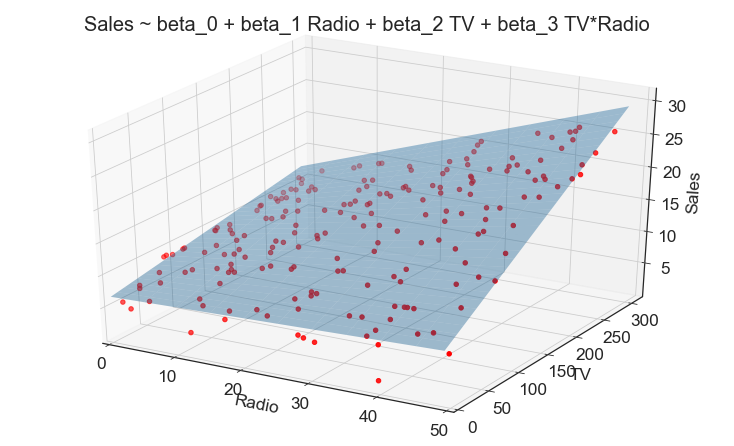

In [16]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Sales ~ beta_0 + beta_1 Radio + beta_2 TV + beta_3 TV*Radio', fontsize=20)
ax = axes3d.Axes3D(fig)

# Model
ax.plot_surface(X1_Radio, X2_TV, Z_model_mix, rstride=10, cstride=5, alpha=0.4)
# Data 
ax.scatter3D(advertising.radio, advertising.TV, advertising.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(bottom=0)
ax.set_zlabel('Sales');

## Multiple Regression: additive without linear assumptions

## Data set: Auto

Auto data set: 
Milles per galleon (mpg) of a car in relation with cylinders, weight, horsepower, etc in 392 different models. 


In [17]:
auto = pd.read_csv('data/Auto.csv', na_values='?').dropna()
auto.describe()

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [18]:
auto.head(3) #show 3 first rows
# mpg: milles per galleon (response variable)
# cylinders, displacement, horsepower, weight, acceleration (predictors variables)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  

## Regression

Predict mpg by considering as predictor variable the horsepower. 

The linear model will be: 

$$
mpg \sim \beta_0 +\beta_1 horsepower
$$

We can try also a non-linear model (polynomial model of degree two):

$$
mpf \sim \beta_0 +\beta_1 horsepower +\beta_2 horsepower^2
$$

We are going to calculate the estimates coefficients as before and to plot the resulting regression line considering the predictor variable horsepower.

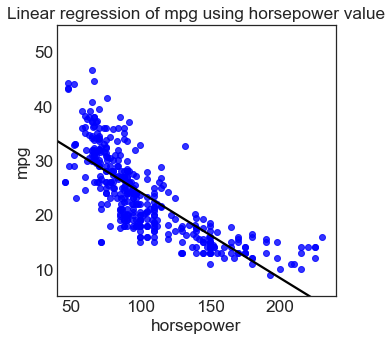

In [19]:
# Lineal regression
fig = plt.figure(figsize=(5,5))
sns.regplot(auto.horsepower, auto.mpg, order=1, ci=None, scatter_kws={'color':'b'}, color='k')
plt.title('Linear regression of mpg using horsepower value')
plt.xlim(40,240)
plt.ylim(5,55);

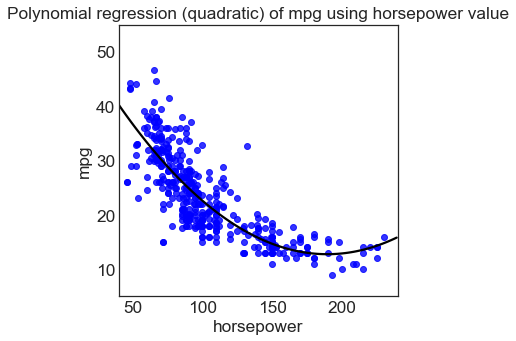

In [20]:
# Polynomial regression of degree (order) 2
fig = plt.figure(figsize=(5,5))
sns.regplot(auto.horsepower, auto.mpg, order=2, ci=None, scatter_kws={'color':'b'}, color='k')
plt.title('Polynomial regression (quadratic) of mpg using horsepower value')
plt.xlim(40,240)
plt.ylim(5,55);

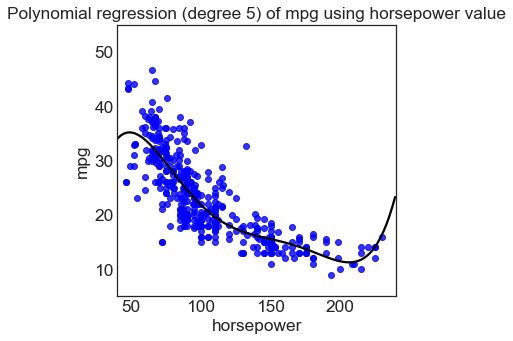

In [21]:
# Polynomial regression of degree 5
fig = plt.figure(figsize=(5,5))
sns.regplot(auto.horsepower, auto.mpg, order=5, ci=None, scatter_kws={'color':'b'}, color='k')
plt.title('Polynomial regression (degree 5) of mpg using horsepower value')
plt.xlim(40,240)
plt.ylim(5,55);

## Identifying non-linearity using residual plots

Residual plots are a useful graphical tool to identifying non-linear relationships between the predictors and the response. Given a linear regression model, 

* The linear model:

$$
\hat{Y} = \hat{\beta}_0 +\hat{\beta}_1 horsepower
$$

* The polynomial model of degree two (quadratic):

$$
\hat{Y} = \hat{\beta}_0 +\hat{\beta}_1 horsepower +\hat{\beta}_2 horsepower^2
$$

* The residuals can be obtained: 
$$
e_i=y_i-\hat{y_i}
$$
    
at each observed point $x_i$.

In [22]:
# Include a new predictor variable
auto['horsepower2'] = auto.horsepower**2
auto.head(3) #show 

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   

   origin                       name  horsepower2  
0       1  chevrolet chevelle malibu      16900.0  
1       1          buick skylark 320      27225.0  
2       1         plymouth satellite      22500.0  

In [23]:
# Data
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg

# Load the model 
regr_model = skl_lm.LinearRegression()

# Linear fit
regr_model.fit(X, y)

auto['pred1'] = regr_model.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].values
regr_model.fit(X2, y)

auto['pred2'] = regr_model.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

auto.head(3) #show 

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   

   origin                       name  horsepower2      pred1    resid1  \
0       1  chevrolet chevelle malibu      16900.0  19.416046 -1.416046   
1       1          buick skylark 320      27225.0  13.891480  1.108520   
2       1         plymouth satellite      22500.0  16.259151  1.740849   

       pred2    resid2  
0  17.091508  0.908492  
1  13.480156  1.519844  
2  14.658717  3.341283  

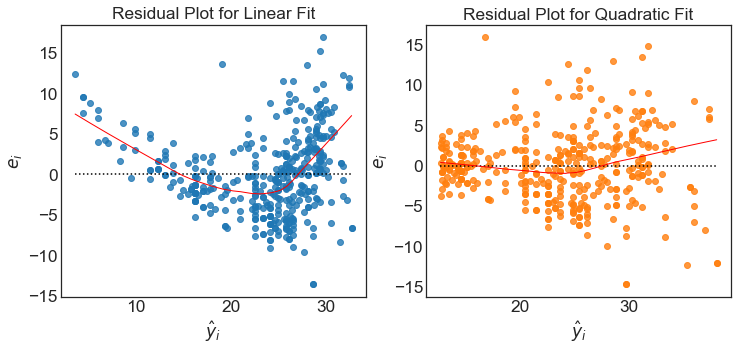

In [24]:
# Plot of the residuals
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot (Linear regression)

# Plot x-axis predicted response and y-axis residual values for each data point

# Smooth fitting
# sns.regplot with lowess: use statsmodels to estimate a nonparametric lowess model 
# (locally weighted linear regression)
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1})
ax1.hlines(0,
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], 
           linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2)
ax2.hlines(0,
           xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], 
           linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('$\hat{y}_i$')
    ax.set_ylabel('$e_i$')

The red line is a smooth fit of the residuals, to identify visually the trend. 
* Left: a linear regression of mpg on horsepower. A strong pattern indicates non-linearity in the data. 
* Right: a linear regression of mpg on horsepower and horsepower$^2$. There is no clear pattern on the residual. 

## Cubic spline. Basis functions

$$
Y \sim \beta_0+ \beta_1 X + \beta_2 X^2 + \beta_3 X^3
$$

Given data  
$$(y_i,x_i)=(wage_i, age_i) \mbox{ for }i=1,\ldots,n$$

The design matrix is the following:

$$
\left[\begin{array}{c}y_1\\\vdots\\y_n\end{array}\right]
\sim 
\left[\begin{array}{c}
1 & x_1 & x_1^2 & x_1^3\\
  & \vdots  &\\
1 & x_n & x_n^2 & x_n^3
\end{array}\right]
\left[\begin{array}{c}\beta_0\\\beta_1\\\beta_2\\\beta_3\end{array}\right]
$$

In [25]:
# Cubic Spline without knots (Basis representation)
x_grid = np.linspace(0., 1., 10) #grid points to see the matrix
design_matrix = dmatrix("bs(x, df=3, degree=3)", 
                        {"x": x_grid})

In [26]:
print(design_matrix)
# [1 x x^2 x^3]
#3+1 degrees of freedom, no knots point. Cubic polynomial.
#print(design_matrix.design_info)

[[1.         0.         0.         0.        ]
 [1.         0.26337449 0.03292181 0.00137174]
 [1.         0.40329218 0.11522634 0.01097394]
 [1.         0.44444444 0.22222222 0.03703704]
 [1.         0.41152263 0.32921811 0.0877915 ]
 [1.         0.32921811 0.41152263 0.17146776]
 [1.         0.22222222 0.44444444 0.2962963 ]
 [1.         0.11522634 0.40329218 0.47050754]
 [1.         0.03292181 0.26337449 0.70233196]
 [1.         0.         0.         1.        ]]


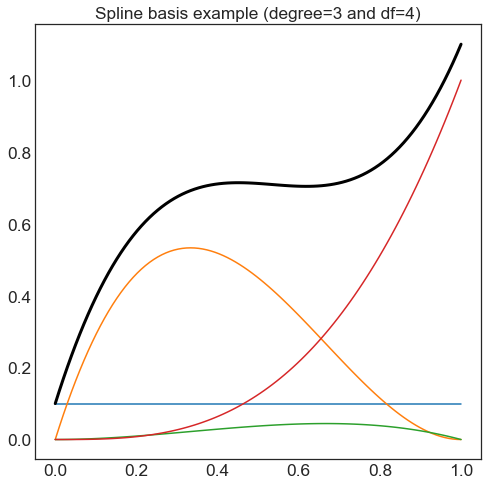

In [27]:
# Plot B-spline basis functions (colored curves) and black line (each multiplied by the selected coeff)

#Grid points to plot
x = np.linspace(0., 1., 100)  
design_matrix = dmatrix("bs(x, df=3, degree=3)", 
                        {"x": x})

# Select some coefficients values
beta = np.array([0.1, 1.2, 0.1, 1]) 

# PLOT
plt.figure(figsize=(8, 8))

# Plot the basis functions
plt.plot(x, design_matrix*beta); 

# Plot the spline itself (sum of the basis functions, thick black curve)
plt.plot(x, np.dot(design_matrix, beta), color='k', linewidth=3);

plt.title("Spline basis example (degree=3 and df=4)");

## Data set: Wage (Salary)

Wage data set: 
Salary of a worker in relation with age, sex, etc in 3000 different persons. 

In [28]:
# Load the data set
wage = pd.read_csv('data/Wage.csv')
print(wage.describe())

          Unnamed: 0         year          age      logwage         wage
count    3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean   218883.373000  2005.791000    42.414667     4.653905   111.703608
std    145654.072587     2.026167    11.542406     0.351753    41.728595
min      7373.000000  2003.000000    18.000000     3.000000    20.085537
25%     85622.250000  2004.000000    33.750000     4.447158    85.383940
50%    228799.500000  2006.000000    42.000000     4.653213   104.921507
75%    374759.500000  2008.000000    51.000000     4.857332   128.680488
max    453870.000000  2009.000000    80.000000     5.763128   318.342430


Given the Wage data we are going to model the following relationship: 
* Age: predictor
* Wage (salary): response.
    
    
$$
wage \sim \beta_0+ \beta_1 age + \beta_2 age^2 + \beta_3 age^3
$$

In [29]:
#############################
# BUILD THE MODEL: 
# 1) input the data using the design matrix (PREDICTOR) and the RESPONSE
# 2) spline regression formula, fitting
#############################
# Spline formula for: 
# Polynomial degree: 0 (constant), 1 (linear), 2 (quadratic), 3 (cubic)
# Number of knots: 3 at points c_1=25, c_2=40, c_3=60
# Degree of freedom: calculated automatically (number of columns of the design matrix)
#############
design_matrix_data_0 = dmatrix("bs(wage.age, degree=0, knots=(25,40,60), include_intercept=False)",
                          {"wage.age": wage.age}, 
                          return_type='dataframe')
#
design_matrix_data_1 = dmatrix("bs(wage.age, degree=1, knots=(25,40,60), include_intercept=False)",
                          {"wage.age": wage.age}, 
                          return_type='dataframe')
#
design_matrix_data_2 = dmatrix("bs(wage.age, degree=2, knots=(25,40,60), include_intercept=False)",
                          {"wage.age": wage.age}, 
                          return_type='dataframe')
#
design_matrix_data_3 = dmatrix("bs(wage.age, degree=3, knots=(25,40,60), include_intercept=False)",
                          {"wage.age": wage.age}, 
                          return_type='dataframe')
#############
regr_model_0 = sm.GLM(wage.wage, design_matrix_data_0).fit()
regr_model_1 = sm.GLM(wage.wage, design_matrix_data_1).fit()
regr_model_2 = sm.GLM(wage.wage, design_matrix_data_2).fit()
regr_model_3 = sm.GLM(wage.wage, design_matrix_data_3).fit()
#############
# PREDICT WITH THE MODEL:
# Use the model to predict over the new values (grid)
#############
age_grid = np.arange(wage.age.min(), wage.age.max()).reshape(-1,1)
#############
design_matrix_grid_0 = dmatrix("bs(age_grid, degree=0, knots=(25,40,60), include_intercept=False)",
                               {"age_grid": age_grid}, 
                               return_type='dataframe')
design_matrix_grid_1 = dmatrix("bs(age_grid, degree=1, knots=(25,40,60), include_intercept=False)",
                               {"age_grid": age_grid}, 
                               return_type='dataframe')
design_matrix_grid_2 = dmatrix("bs(age_grid, degree=2, knots=(25,40,60), include_intercept=False)",
                               {"age_grid": age_grid}, 
                               return_type='dataframe')
design_matrix_grid_3 = dmatrix("bs(age_grid, degree=3, knots=(25,40,60), include_intercept=False)",
                               {"age_grid": age_grid}, 
                               return_type='dataframe')
#############
pred0 = regr_model_0.predict(design_matrix_grid_0)
pred1 = regr_model_1.predict(design_matrix_grid_1)
pred2 = regr_model_2.predict(design_matrix_grid_2)
pred3 = regr_model_3.predict(design_matrix_grid_3)
#############

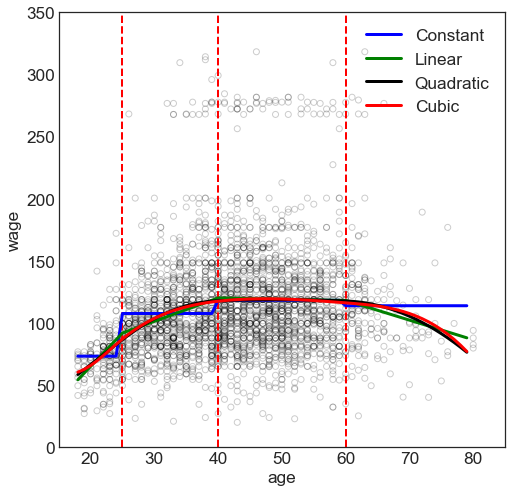

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.2)

plt.plot(age_grid, pred0, color='b', linewidth=3, label='Constant')
plt.plot(age_grid, pred1, color='g', linewidth=3, label='Linear')
plt.plot(age_grid, pred2, color='k', linewidth=3, label='Quadratic')
plt.plot(age_grid, pred3, color='r', linewidth=3, label='Cubic')

[plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='r') for i in [25,40,60]]
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage');

In [31]:
# Coefficients of the Cubic Spline
print(design_matrix_data_3.shape)
#fit3.params
beta_0 = regr_model_3.params['Intercept']
beta_1 = regr_model_3.params[0]
beta_2 = regr_model_3.params[1]
beta_3 = regr_model_3.params[2]
beta_4 = regr_model_3.params[3]
beta_5 = regr_model_3.params[4]
beta_6 = regr_model_3.params[5]

print(beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6)

(3000, 7)
60.493714189986065 60.493714189986065 3.9804996751763317 44.63097983218805 62.83878755167895 55.99083000926981 50.688097751691856


## Knots number and locations

The regression spline is more flexible in regions with more knots, because the polynomial coefficients can change rapidly and adapt better the data shape. The idea it to place more knots where the function might vary rapidly and less knots where is more stable. 

However, in practice is common to place knots using an uniform grid. One possible way to do that is to, instead of fixing the knots, fix the degrees of freedom and then the python function will automatically place the corresponding number of knots at uniform quantiles of the data. 


In [32]:
#############################
# Cubic spline specifying degrees of freedom
#############################
# df = 1 + 3 + number of knots (python 3 + k)
#######
# Build the model:
design_matrix_data_3_6 = dmatrix("bs(wage.age, degree=3, df=6, include_intercept=False)",
                        {"wage.age": wage.age}, 
                         return_type='dataframe')

regr_model_3_6 = sm.GLM(wage.wage, design_matrix_data_3_6).fit()
#######
# Predict with the model:
design_matrix_grid_3_6 = dmatrix("bs(age_grid, degree=3, df=6, include_intercept=False)",
                             {"age_grid": age_grid}, 
                             return_type='dataframe')
pred3_6 = regr_model_3_6.predict(design_matrix_grid_3_6)
#######
print(design_matrix_grid_3_6.shape)
#fit3_6.params
#Python chooses 3 knots which correspond to the 25th, 50th, and 75th percentiles of age.
#DF = Number of columns in the design matrix
#############################

(62, 7)


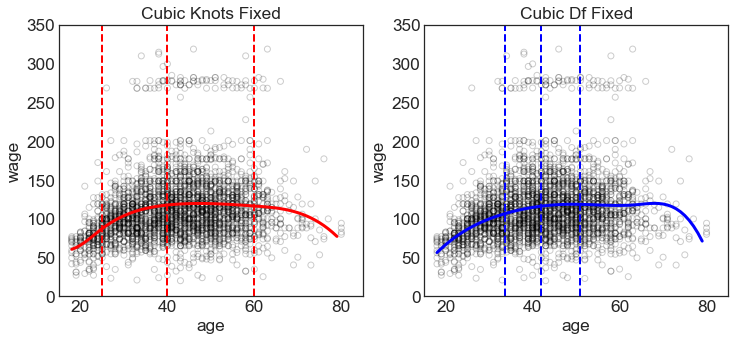

In [33]:
#PLOTS
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
#######
# Left
ax1.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.2)
ax1.plot(age_grid, pred3, color='r', linewidth=3)
[ax1.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='r') for i in [25,40,60]]

ax1.set_xlim(15,85)
ax1.set_ylim(0,350)
ax1.set_xlabel('age')
ax1.set_ylabel('wage')
ax1.set_title('Cubic Knots Fixed');
#######
# Right
ax2.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.2)
ax2.plot(age_grid, pred3_6, color='b', linewidth=3)
[ax2.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b') for i in [33.75,42,51]]#from describe data frame

ax2.set_xlim(15,85)
ax2.set_ylim(0,350)
ax2.set_xlabel('age')
ax2.set_ylabel('wage')
ax2.set_title('Cubic Df Fixed');

Try different knots and degrees of freedom and see how the curves change. 

A more objective approach is to use cross-validation. Remove a portion of the data, fit a spline with the remaining data, and then use the spline to make predictions over the separated data. Repeat this process multiple times until each observation has been left out once, and then compute the overall cross-validated RSS. The procedure can be repeated with different number of knots and the value given the smallest RSS is chosen. 

## Splines vs Polynomials

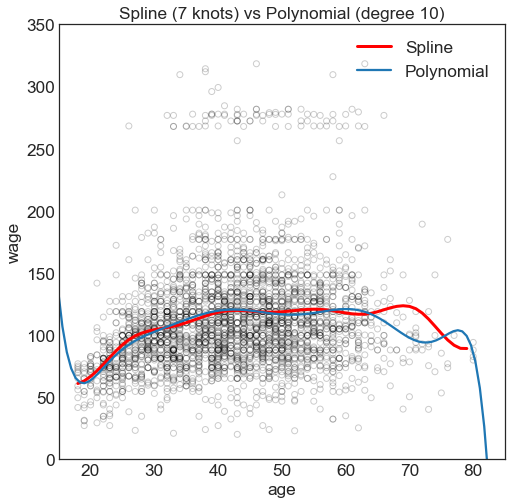

In [34]:
#############################
# Splines versus Polynomials
#############################
# Spline regression degree=3 df=10 (10-3 = 7 knots)
#######
# Fit the model
design_matrix_data_5 = dmatrix("bs(wage.age, degree=3, df=10, include_intercept=False)",
                          {"wage.age": wage.age}, 
                          return_type='dataframe')
regr_model_5 = sm.GLM(wage.wage, design_matrix_data_5).fit()
#######
# Predict 
age_grid = np.arange(wage.age.min(), wage.age.max()).reshape(-1,1)
design_matrix_grid_5 = dmatrix("bs(age_grid, degree=3, df=10, include_intercept=False)",
                               {"age_grid": age_grid}) 
pred5 = regr_model_5.predict(design_matrix_grid_5)
#############################
# Plot
plt.figure(figsize=(8,8))
plt.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.2)
plt.plot(age_grid, pred5, color='r', linewidth=3, label='Spline')
#######
# Polynomial regression degree=10
sns.regplot(wage.age, wage.wage, order=10, ci=None, scatter=False, label='Polynomial')                               
#######                      
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Spline (7 knots) vs Polynomial (degree 10)');

## Data set: Hitters
Hitters data set: Records and salaries for baseball players.

* baseball player’s Salary (measured in thousands of dollars)
* Years (the number of years that he has played in the major leagues)
* Hits (the number of hits that he made in the previous year)

In [35]:
hitters = pd.read_csv('data/Hitters.csv', index_col=0).dropna()
#removes all of the rows that have missing values in any variable
hitters.describe()

            AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   403.642586  107.828897   11.619772   54.745247   51.486692   41.114068   
std    147.307209   45.125326    8.757108   25.539816   25.882714   21.718056   
min     19.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    282.500000   71.500000    5.000000   33.500000   30.000000   23.000000   
50%    413.000000  103.000000    9.000000   52.000000   47.000000   37.000000   
75%    526.000000  141.500000   18.000000   73.000000   71.000000   57.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years        CAtBat        CHits      CHmRun        CRuns  \
count  263.000000    263.000000   263.000000  263.000000   263.000000   
mean     7.311787   2657.543726   722.186312   69.239544   361.220532   
std      4.793616   2286.582929   648.199644   82.1

In [36]:
hitters.head(3)

               AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
-Alan Ashby      315    81      7    24   38     39     14    3449    835   
-Alvin Davis     479   130     18    66   72     76      3    1624    457   
-Andre Dawson    496   141     20    65   78     37     11    5628   1575   

               CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  \
-Alan Ashby        69    321   414     375      N        W      632       43   
-Alvin Davis       63    224   266     263      A        W      880       82   
-Andre Dawson     225    828   838     354      N        E      200       11   

               Errors  Salary NewLeague  
-Alan Ashby        10   475.0         N  
-Alvin Davis       14   480.0         A  
-Andre Dawson       3   500.0         N  

## Dummy Predictor Variables

In [37]:
# Prepare the response and predictor variables
# Response variable
y_salary = hitters.Salary

In [38]:
# Predictor variables

# Add dummy variables
# League A/N
# Division East West
# NewLeague A/N
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])
#dummies.describe()
dummies.head(3)

               League_A  League_N  Division_E  Division_W  NewLeague_A  \
-Alan Ashby           0         1           0           1            0   
-Alvin Davis          1         0           0           1            1   
-Andre Dawson         0         1           1           0            0   

               NewLeague_N  
-Alan Ashby              1  
-Alvin Davis             0  
-Andre Dawson            1  

In [39]:
# Delete the column with the independent variable (Salary), and change columns for which we created dummy variables
x_predictors_ = hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Include the new dummy variables
x_predictors = pd.concat([x_predictors_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
#x_predictors.describe()
x_predictors.head(3)

               AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  \
-Alan Ashby    315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0   
-Alvin Davis   479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0   
-Andre Dawson  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   

               CHmRun  CRuns   CRBI  CWalks  PutOuts  Assists  Errors  \
-Alan Ashby      69.0  321.0  414.0   375.0    632.0     43.0    10.0   
-Alvin Davis     63.0  224.0  266.0   263.0    880.0     82.0    14.0   
-Andre Dawson   225.0  828.0  838.0   354.0    200.0     11.0     3.0   

               League_N  Division_W  NewLeague_N  
-Alan Ashby           1           1            1  
-Alvin Davis          0           1            0  
-Andre Dawson         1           0            1  

## Train and Test 

We now split the samples into a TRAIN set and a TEST set in order
to estimate later on the test error of lasso regression and select the parameter using cross-validation.

In [40]:
# Split data into training and test sets
# (Fct) Split arrays or matrices into random train and test subsets
X_train, X_test , y_train, y_test = train_test_split(x_predictors, y_salary, test_size=0.5, random_state=1)

# test_size: represent the proportion of the dataset to include in the test split
# random_state: is the seed used by the random number generator

## Lasso fitting method
### Fix lasso parameter by using a uniform grid
We will generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept:

In [41]:
lambdas = 2*10**np.linspace(10,-2,100)*0.5
print(lambdas.shape)
print(min(lambdas))
print(max(lambdas))

(100,)
0.01
10000000000.0


Associated with each alpha value is a vector of Lasso regression coefficients, which we will
store in a matrix called `coefs`. In this case, it is a $19 \times 100$
matrix, with 19 rows (one for each predictor) and 100
columns (one for each value of alpha). 

We will want to standardize the
variables so that they are on the same scale. To do this, we can use the
`normalize = True` parameter:

In [42]:
# Load the model
regr_model_lasso = skl_lm.Lasso(max_iter=10000, normalize=True)

In [43]:
coefs = []
for a in lambdas:
    regr_model_lasso.set_params(alpha=a)
    regr_model_lasso.fit(scale(X_train), y_train)
    coefs.append(regr_model_lasso.coef_)

#scale(X_train)
#from sklearn.preprocessing import scale
#Standardize a dataset along any axis
#Center to the mean and component wise scale to unit variance.

In [44]:
np.shape(coefs)

(100, 19)

We expect the coefficient estimates to be much smaller, in terms of $l_1$ norm,
when a large value of alpha is used, as compared to when a small value of alpha is
used. Let's plot and find out:

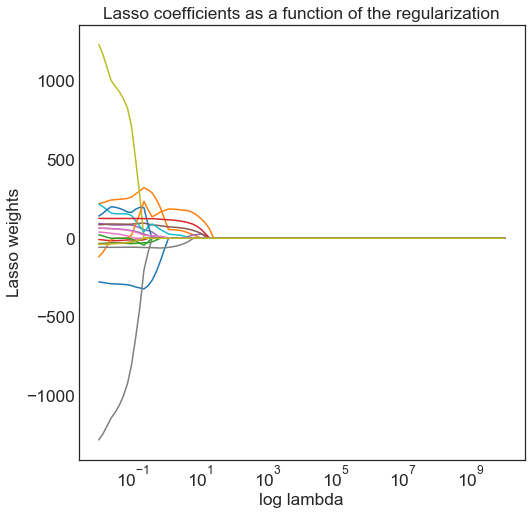

In [45]:
# PLOT
# x axis: grid values of lambda (log scale to see something)
# y axis 
plt.figure(figsize=(8, 8))
ax = plt.gca()
ax.plot(lambdas, coefs) 
ax.set_xscale('log') 
plt.axis('tight')
plt.xlabel('log lambda')
plt.ylabel('Lasso weights')
plt.title('Lasso coefficients as a function of the regularization');

### Select the best parameter value
Notice that in the coefficient plot that depending on the choice of the $\lambda$
parameter, some of the coefficients are exactly equal to zero. 

In order to select the best $\lambda$ (that is, the best lasso model). We perform a K-fold cross-validation with $K=10$.

In [46]:
#Select the best Lambda Parameter (MODEL)
# Scikit Learn sklearn.linear_model.LassoCV.
#Lasso linear model with iterative fitting along a regularization path
#The best model is selected by cross-validation.

regr_model_lassocv = skl_lm.LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
regr_model_lassocv.fit(X_train, y_train)

#alphas = None; If None alphas are set automatically
#cv : int, integer, to specify the number of folds.
#max_iter:  The maximum number of iterations
#normalize = True; X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

#Value of the lambda parameter obtained
print(regr_model_lassocv.alpha_)

2.402973015740077


In [47]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(regr_model_lasso.coef_, index=x_predictors.columns)

AtBat          -277.767878
Hits            218.984081
HmRun           -33.957207
Runs             -8.408902
RBI              94.579192
Walks            85.214390
Years            39.104651
CAtBat        -1281.822131
CHits          1230.963057
CHmRun          216.272113
CRuns           140.851421
CRBI           -118.693674
CWalks           21.515332
PutOuts         125.783134
Assists          63.843153
Errors          -36.121799
League_N         63.885727
Division_W      -57.372276
NewLeague_N     -38.774642
dtype: float64

### Check the Mean Squared predictive error

Fit the model with the TRAIN data and then test the error obtained over the TEST data.

$$
MSE=\frac{1}{N-n}\sum_{i=n+1}^N y_i -\hat{y}_i
$$

In [48]:
# Error with the Best lambda
regr_model_lasso.set_params(alpha=regr_model_lassocv.alpha_)
regr_model_lasso.fit(X_train, y_train);
mean_squared_error(y_test, regr_model_lasso.predict(X_test))

104960.65853895503

In [49]:
# Error is bigger with the 1st lambda of the grid
regr_model_lasso.set_params(alpha=lambdas[-1])
regr_model_lasso.fit(X_train, y_train)
mean_squared_error(y_test, regr_model_lasso.predict(X_test))

113578.33865810485

In [50]:
# Error is bigger with the last lambda of the grid
regr_model_lasso.set_params(alpha=lambdas[0])
regr_model_lasso.fit(X_train, y_train)
mean_squared_error(y_test, regr_model_lasso.predict(X_test))

172862.23592080915